In [27]:
import spacy
import pandas as pd
import numpy as np

import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata 

#lp = spacy.load("en_core_web_sm")



file = pd.read_csv(r'C:\Users\kim\Downloads\uselection2016_comments3.csv')

file.drop_duplicates(keep=False, inplace=True)

file = file[file['body'].notnull()]


file['body'] = file['body'].apply(lambda x:" ".join(str(x) for x in x.split()))
#take out url's
file['body'] = file['body'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

# make lowercase
file['body'] = file['body'].apply(lambda x:" ".join(x.lower() for x in x.split()))




from textblob import TextBlob



# compute sentiment scores (polarity) and labels

sentiment_scores_tb = [round(TextBlob(str(tweet)).sentiment.polarity, 3) for tweet in file['body']]

sentiment_category_tb = ['positive' if score > 0 

                             else 'negative' if score < 0 

                                 else 'neutral' 

                                     for score in sentiment_scores_tb]





# sentiment statistics per news category

df = pd.DataFrame([sentiment_scores_tb, sentiment_category_tb]).T

combined_df = pd.concat([df, file], axis=1)

combined_df.to_csv(r'C:\Users\kim\Documents\uselection2016_comments3_textblob.csv')

In [11]:
import pandas as pd 

df = pd.DataFrame([list(file['link_title']), list(file['author']), list(file['body']), list(file['edited']), list(file['id']), list(file['link_id']), list(file['parent_id']), list(file['permalink']), list(file['replies']), list(file['score']), list(file['stickied']), list(file['subreddit']), list(file['subreddit_id']), sentiment_scores_tb, sentiment_category_tb]).T

df.to_csv(r'C:\Users\kim\Documents\FACEBOOK_COMBINED_FINAL_textBlob_sentimentscore.csv')

In [ ]:
df.columns = ['Keywords', 'sentiment_score', 'sentiment_category']

df['sentiment_score'] = df.sentiment_score.astype('float')

df.groupby(by=['Keywords']).describe()

import seaborn as sns

#graph it

fc = sns.factorplot(x="Keywords", hue="sentiment_category", 

                    data=df, kind="count", size = 5.5,

                    palette={"negative": "#FE2020", 

                             "positive": "#BADD07", 

                             "neutral": "#68BFF5"})

#fc.savefig(r"C:\Users\kim\Pictures\output.png")

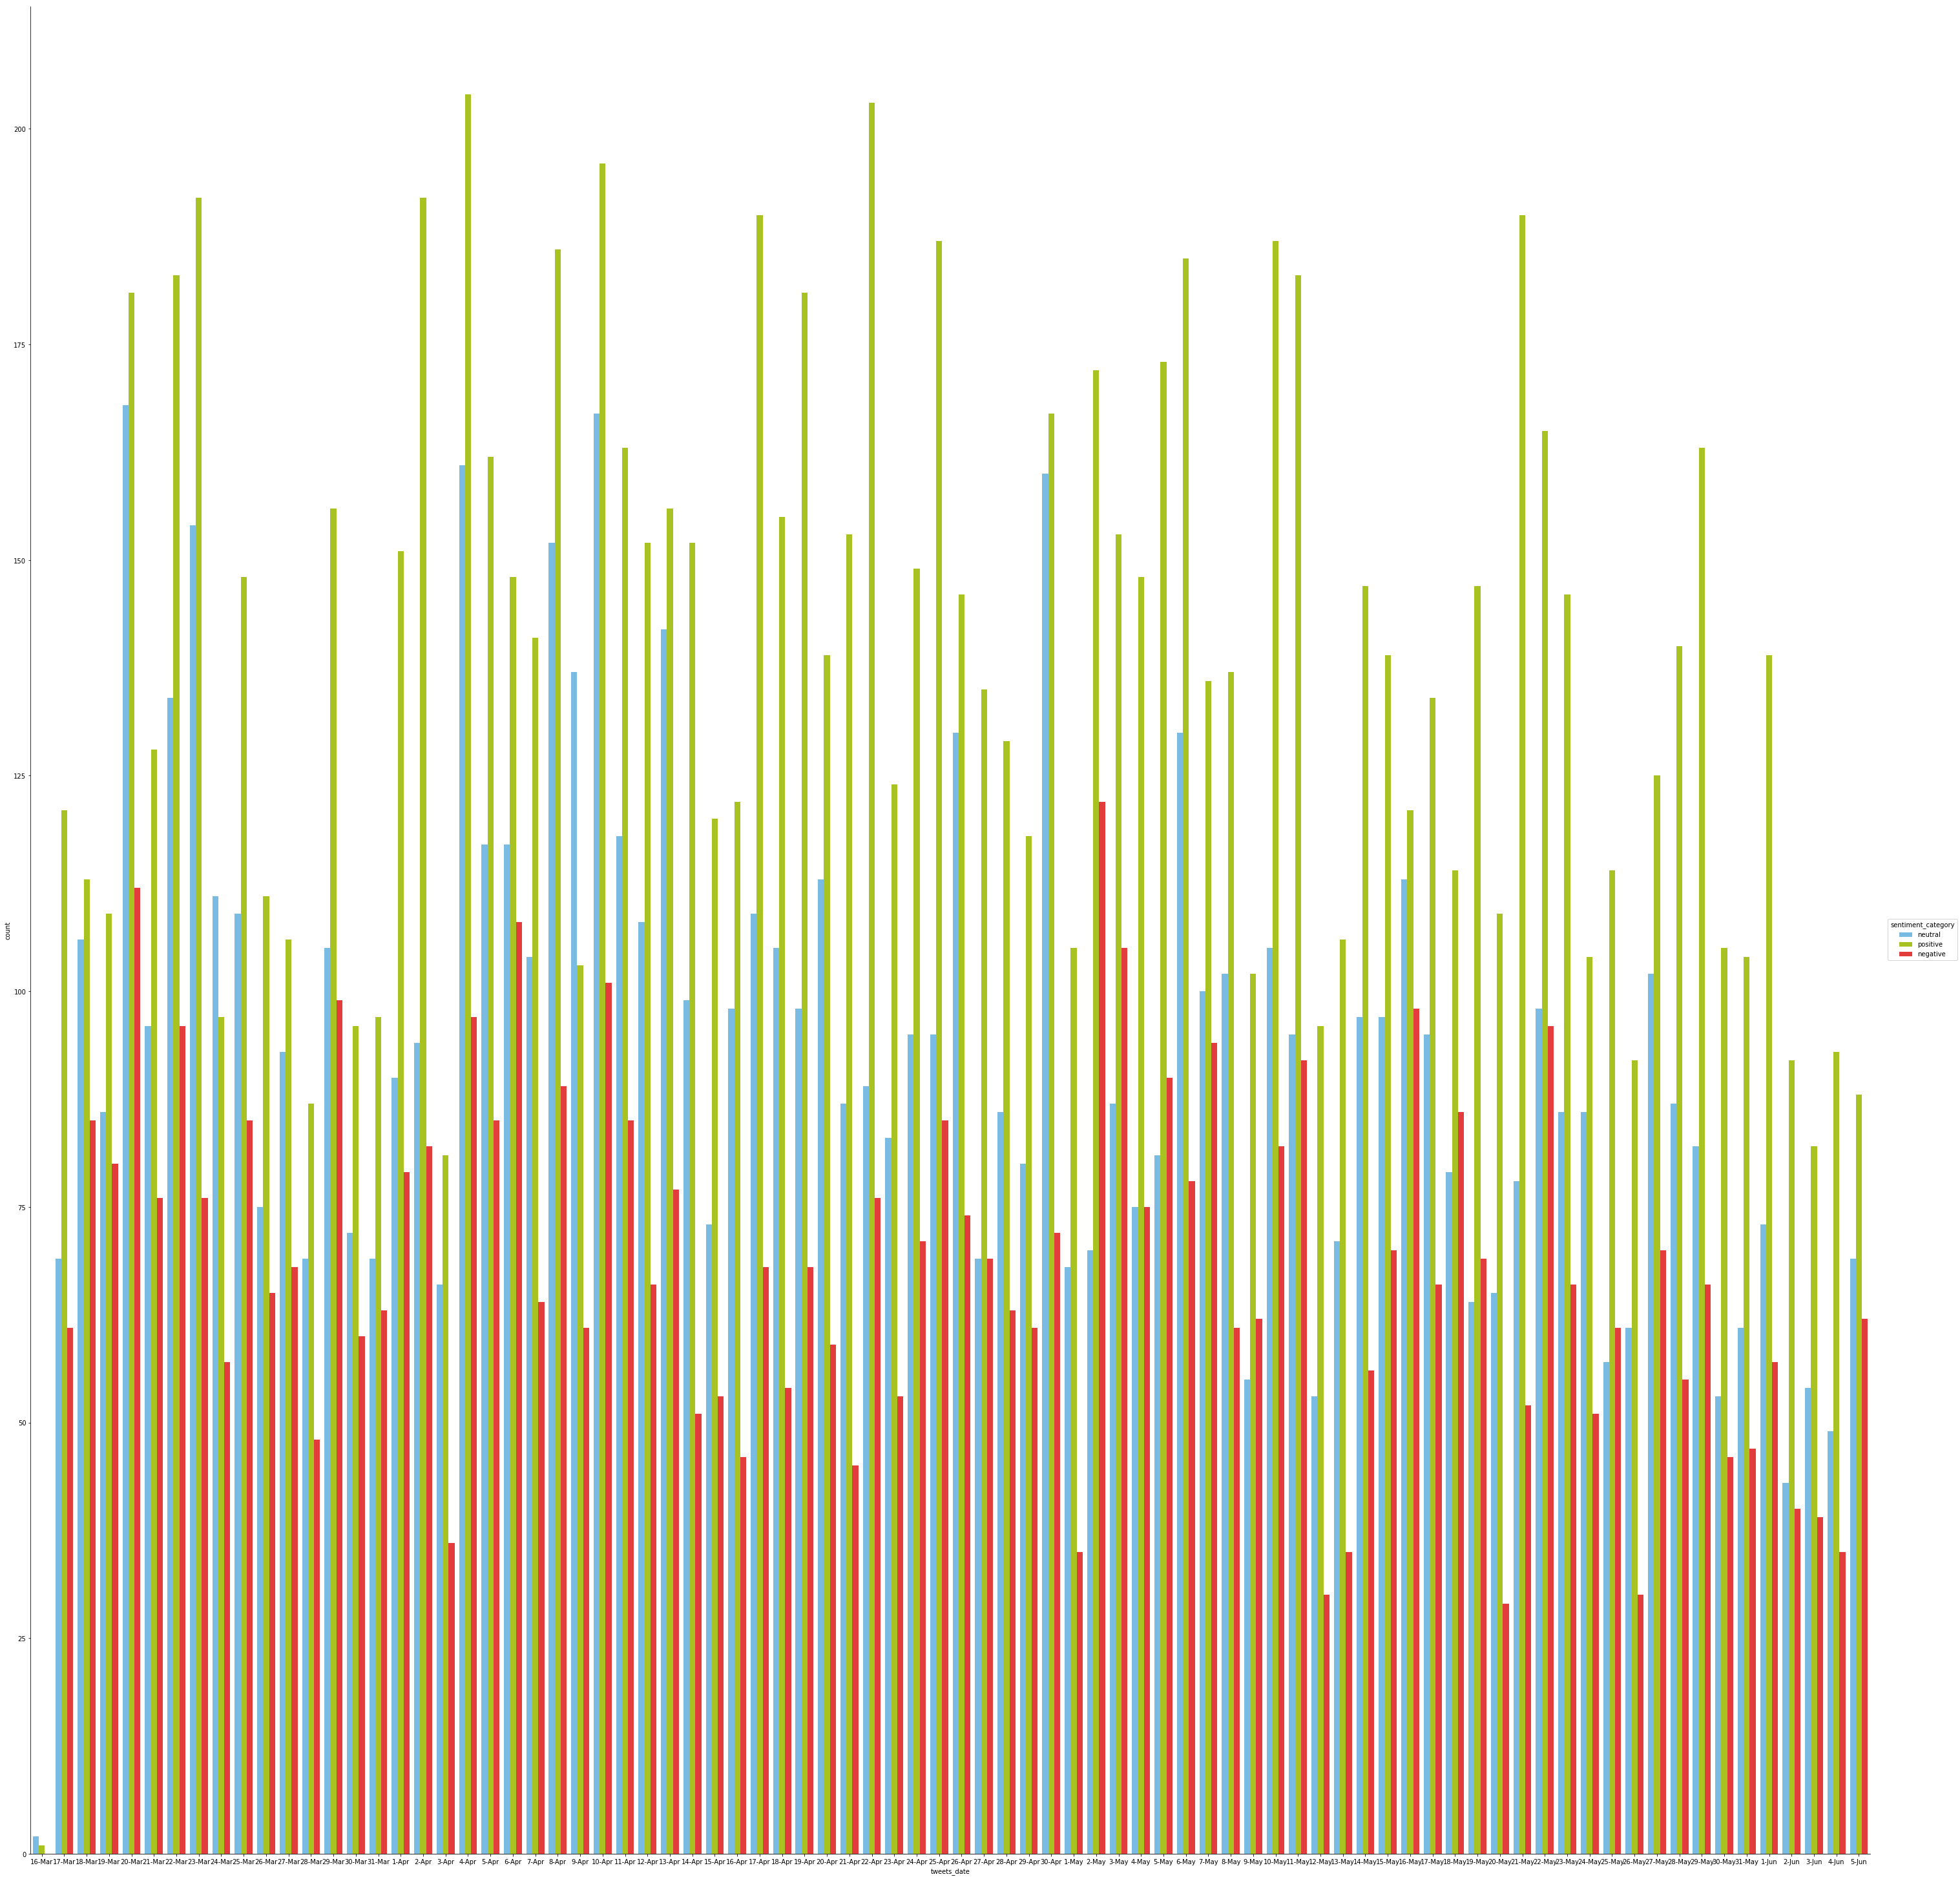

In [26]:
import pandas as pd 

df = pd.read_csv(r'C:\Users\kim\Pictures\CA_SENTIMENT.csv')

df['sentiment'].describe()
sentiment_category = ['positive' if score > 0 

                             else 'negative' if score < 0 

                                 else 'neutral' 

                                     for score in df['sentiment']]


df = pd.DataFrame([list(df['tweets_date']), sentiment_category]).T

df.columns = ['tweets_date', 'sentiment_category']

#df['sentiment'] = df.sentiment.astype('float')

df.groupby(by=['tweets_date']).describe()

df.to_csv(r"C:\Users\kim\Pictures\grouping.csv")

import seaborn as sns

#graph it

fc = sns.factorplot(x="tweets_date", hue="sentiment_category", 

                    data=df, kind="count", size = 40.5,

                    palette={"negative": "#FE2020", 

                             "positive": "#BADD07", 

                             "neutral": "#68BFF5"})

#fc.savefig(r"C:\Users\kim\Pictures\output.png")

In [24]:

file = pd.read_csv(r'C:\Users\kim\Documents\FACEBOOK_COMBINED_FINAL_textBlob_sentimentscore.csv')

print(len(file))

file.drop_duplicates(keep=False, inplace=True)

print(len(file))

print(file)


41302
41302
       Unnamed: 0                                                  0  \
0               0  https://www.reddit.com/r/conspiracy/comments/8...   
1               1  https://www.reddit.com/r/conspiracy/comments/8...   
2               2  https://www.reddit.com/r/conspiracy/comments/8...   
3               3  https://www.reddit.com/r/conspiracy/comments/8...   
4               4  https://www.reddit.com/r/conspiracy/comments/8...   
5               5  https://www.reddit.com/r/conspiracy/comments/8...   
6               6  https://www.reddit.com/r/conspiracy/comments/8...   
7               7  https://www.reddit.com/r/conspiracy/comments/8...   
8               8  https://www.reddit.com/r/conspiracy/comments/8...   
9               9  https://www.reddit.com/r/conspiracy/comments/8...   
10             10  https://www.reddit.com/r/conspiracy/comments/8...   
11             11  https://www.reddit.com/r/conspiracy/comments/8...   
12             12  https://www.reddit.com/r/conspira

[41302 rows x 16 columns]
